# TNSE with SHAP

#### Import libraries

In [1]:
from numpy import loadtxt
from numpy import concatenate
from numpy import array
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

#### Load data

In [2]:
php_shap = loadtxt('../data/PHP-shap.csv', delimiter=',')
ruby_shap = loadtxt('../data/ruby-shap.csv', delimiter=',')
c_shap = loadtxt('../data/c-shap.csv', delimiter=',')
py_shap = loadtxt('../data/python-shap.csv', delimiter=',')

#### TNSE

In [59]:
x = []

In [60]:
x.append(php_shap)
x.append(ruby_shap)
x.append(c_shap)
x.append(py_shap)

In [61]:
x

[array([ 0.00000000e+00, -1.28933461e-04, -9.25878529e-04, ...,
         3.22210144e-05,  0.00000000e+00,  4.90498304e-01]),
 array([0.00000000e+00, 1.01491425e-03, 2.20503964e-04, ...,
        0.00000000e+00, 0.00000000e+00, 4.14431870e-01]),
 array([ 0.00000000e+00, -1.17444339e-04, -1.74127845e-03, ...,
         6.64310137e-05,  3.96000246e-07,  5.88908613e-01]),
 array([ 0.00000000e+00, -1.78455643e-03, -3.41245468e-04, ...,
         1.16481351e-04,  0.00000000e+00,  1.70275047e-01])]

In [62]:
aux = []

In [63]:
aux.append(0)
aux.append(1)
aux.append(2)
aux.append(3)

In [64]:
y = array(aux)

In [65]:
y

array([0, 1, 2, 3])

In [70]:
tsne = TSNE(n_components=3, verbose=1, perplexity=50, n_iter=300)

In [71]:
X_2d = tsne.fit_transform(x)

[t-SNE] Computing 3 nearest neighbors...
[t-SNE] Indexed 4 samples in 0.018s...
[t-SNE] Computed neighbors for 4 samples in 0.080s...
[t-SNE] Computed conditional probabilities for sample 4 / 4
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 33.067951
[t-SNE] KL divergence after 300 iterations: 0.270157


In [72]:
X_2d

array([[-406.91223 , -318.71777 , -126.32597 ],
       [-190.22305 , -329.47055 ,  458.89935 ],
       [ 674.52386 ,  293.4485  ,  -90.72696 ],
       [ -77.297424,  354.74124 , -241.64622 ]], dtype=float32)

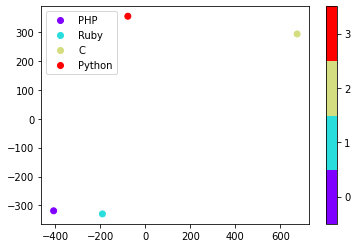

In [85]:
# plot the result
vis_x = X_2d[:, 0]
vis_y = X_2d[:, 1]
plt.scatter(vis_x, vis_y, c=y, cmap=plt.cm.get_cmap("rainbow", 4))
plt.colorbar(ticks=range(4))
plt.clim(-0.5, 3.5)
classes = ['PHP', 'Ruby', 'C', 'Python']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.savefig('../reports/languages-tnse.png')
plt.show()

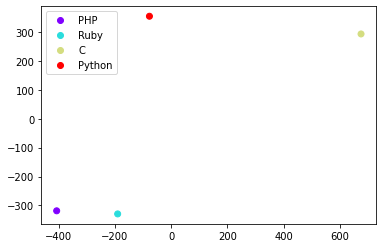

In [81]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
classes = ['PHP', 'Ruby', 'C', 'Python']
colours = ListedColormap(['r','b','g', 'y'])
scatter = plt.scatter(vis_x, vis_y, c=y, cmap=plt.cm.get_cmap("rainbow", 4))
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

In [28]:
from yellowbrick.text import TSNEVisualizer

In [29]:
# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(x, y)
tsne.show()

MemoryError: 